In [0]:
import pickle
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils import plot_model
from keras import backend as K
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('th')

In [0]:
with open('train_image.pkl', 'rb') as f:
    data = pickle.load(f)
    data = np.array(data)
    data = data.reshape(-1, 28, 28)

    

In [0]:
with open('train_label.pkl', 'rb') as f:
    label = pickle.load(f)
    label = np.array(label)
    label = label.reshape(-1, 1)

In [0]:
label.shape

(8000, 1)

In [0]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.20, random_state=42)

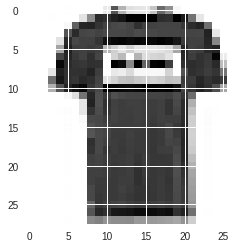

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(data[0], interpolation='nearest')
plt.show()

In [0]:
data_train = data_train.reshape(data_train.shape[0], 1, 28, 28).astype('float32')
data_test = data_test.reshape(data_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
label_train.shape

(6400, 7)

In [10]:

label_train = np_utils.to_categorical(label_train)
label_test = np_utils.to_categorical(label_test)
num_classes = label_test.shape[1]
print(num_classes)

7


In [0]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=5,input_shape=(1, 28, 28), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(7, activation = "softmax"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [17]:
model = cnn_model()
history = model.fit(data_train, label_train, validation_data=(data_test, label_test), epochs=20, batch_size=32, verbose=2)
scores = model.evaluate(data_test, label_test, verbose=0)
print('CNN Error {}'.format(100-scores[1]*100))

Train on 6400 samples, validate on 1600 samples
Epoch 1/20
 - 2s - loss: 0.0923 - acc: 0.9666 - val_loss: 0.5633 - val_acc: 0.8606
Epoch 2/20
 - 2s - loss: 0.0937 - acc: 0.9633 - val_loss: 0.5614 - val_acc: 0.8694
Epoch 3/20
 - 2s - loss: 0.0902 - acc: 0.9666 - val_loss: 0.5833 - val_acc: 0.8562
Epoch 4/20
 - 2s - loss: 0.0780 - acc: 0.9702 - val_loss: 0.6294 - val_acc: 0.8725
Epoch 5/20
 - 2s - loss: 0.0851 - acc: 0.9689 - val_loss: 0.6256 - val_acc: 0.8650
Epoch 6/20
 - 2s - loss: 0.0852 - acc: 0.9689 - val_loss: 0.5617 - val_acc: 0.8719
Epoch 7/20
 - 2s - loss: 0.0777 - acc: 0.9727 - val_loss: 0.6266 - val_acc: 0.8606
Epoch 8/20
 - 2s - loss: 0.0888 - acc: 0.9692 - val_loss: 0.5294 - val_acc: 0.8681
Epoch 9/20
 - 2s - loss: 0.0879 - acc: 0.9666 - val_loss: 0.5719 - val_acc: 0.8769
Epoch 10/20
 - 2s - loss: 0.0886 - acc: 0.9681 - val_loss: 0.5276 - val_acc: 0.8675
Epoch 11/20
 - 2s - loss: 0.0768 - acc: 0.9714 - val_loss: 0.6629 - val_acc: 0.8694
Epoch 12/20
 - 2s - loss: 0.0675 - ac

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 12, 12)        48        
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 10, 10)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 5, 5)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 5, 5)          20        
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


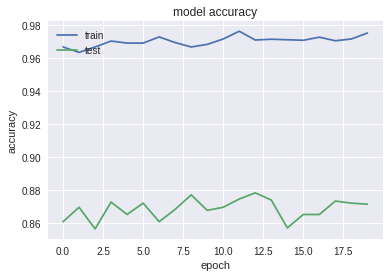

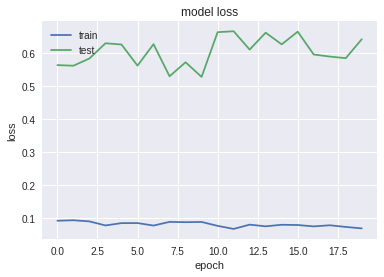

In [19]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
with open('test_image.pkl', 'rb') as f:
    test_data = pickle.load(f)
    test_data = np.array(test_data)
    test_data = test_data.reshape(-1, 1, 28, 28)

In [0]:
import pandas as pd

In [0]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions, axis=1)
predictions = pd.Series(predictions, name="predicted class")
submit = pd.concat([pd.Series(range(2000),name = "Test_image_index"), predictions], axis=1)
submit.to_csv("Shivam_Gupta.csv", index=False)